<a href="https://colab.research.google.com/github/sirishagoud12/CODEWAY/blob/main/SPAM_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
//Spam Detection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
data = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',
                 encoding='iso-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Preprocessing

In [ ]:
data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [ ]:
data = data.rename(columns={"v1":"Label","v2":"SMS"})
data

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data.groupby("Label").count()

,SMS
Label,
ham,4825
spam,747


In [ ]:
data.describe()

,Label,SMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
data = data.drop_duplicates()

In [ ]:
data["Number of chars"] = data["SMS"].apply(len)
data

,Label,SMS,Number of chars
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

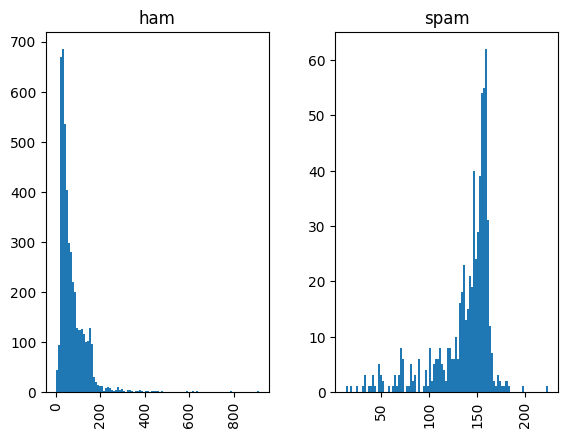

In [ ]:
data.hist(column="Number of chars",by="Label",bins=100)


In [ ]:
data.Label = [1 if kod =="spam" else 0 for kod in data.Label]
data

,Label,SMS,Number of chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [ ]:
import re
def letters(sentence):
    place=re.compile("[^a-zA-Z]")
    return re.sub(place," ",sentence)


In [ ]:

spam = []
ham = []
all_sentences = []

for i in range(len(data["SMS"].values)):
    r1 = data["SMS"].values[i]
    r2 = data["Label"].values[i]
    clear_sentence = []
    sentences = letters(r1)
    sentences=sentences.lower()

    for words in sentences.split():
        clear_sentence.append(sentences)

        if r2 == 1:
            spam.append(sentences)
        else :
            ham.append(sentences)

    all_sentences.append(" ".join(clear_sentence))

In [ ]:
data["New Sentences"] = all_sentences

In [ ]:
data.drop(["SMS","Number of chars"],axis=1,inplace=True)

In [ ]:
from nltk.corpus import stopwords
",".join(stopwords.words("english"))
stop_words = set(stopwords.words("english"))


# Removing stopwords

In [ ]:
def remove_stop(x):
    return " ".join([word for word in str(x).split() if word not in stop_words])
data["New Sentences"] = data["New Sentences"].apply(lambda x:remove_stop(x))

# Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data["New Sentences"]).toarray()

In [ ]:
y = data["Label"]
X = X

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
acs = accuracy_score(y_test,y_pred)
acs*100

93.52030947775629